# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Laila Rahmatin Nisa'
- **Email:** lailarahmatinnisa@gmail.com
- **ID Dicoding:** laila_rn2410

## Menentukan Pertanyaan Bisnis

- Apa faktor utama yang memengaruhi jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda berdasarkan musim, cuaca, dan hari kerja/libur?

## Import Semua Packages/Library yang Digunakan

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [35]:
# Load dataset
day_df = pd.read_csv("/content/day.csv")
hour_df = pd.read_csv("/content/hour.csv")

In [36]:
# Tampilkan informasi awal dataset
print("Informasi Dataset Harian:")
day_df.info()
print("\nInformasi Dataset Per Jam:")
hour_df.info()

Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi Dataset Per Jam:
<class 'pandas.core.frame.DataFrame'>
R

In [37]:
# Convert 'dteday' to datetime objects
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [38]:
# Tampilkan beberapa baris pertama
day_head = day_df.head()
hour_head = hour_df.head()
day_head, hour_head

(   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1 2011-01-01       1   0     1        0        6           0   
 1        2 2011-01-02       1   0     1        0        0           0   
 2        3 2011-01-03       1   0     1        0        1           1   
 3        4 2011-01-04       1   0     1        0        2           1   
 4        5 2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    instant

**Insight:**
- Dataset day.csv (Agregasi Harian)

Memiliki 731 entri dan 16 kolom.
Tidak ada data yang hilang (non-null semua).
Variabel utama:
Waktu: dteday, season, yr, mnth, weekday, holiday, workingday.
Kondisi Cuaca: weathersit, temp, atemp, hum, windspeed.
Jumlah Peminjaman: casual, registered, cnt (total).
- Dataset hour.csv (Agregasi Per Jam)

Memiliki 17.379 entri dan 17 kolom.
Sama seperti day.csv, tidak ada data yang hilang.
Perbedaan utama dengan day.csv adalah adanya kolom hr (jam, 0-23).

### Assessing Data

In [39]:
# Statistik deskriptif untuk dataset harian
print("\nStatistik Deskriptif Dataset Harian:")
day_stats = day_df.describe()
day_stats


Statistik Deskriptif Dataset Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [40]:
# Statistik deskriptif untuk dataset per jam
print("\nStatistik Deskriptif Dataset Per Jam:")
hour_stats = hour_df.describe()
hour_stats


Statistik Deskriptif Dataset Per Jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- tidak ada missing values
- terdapat dtype str pada fitur dteday yang harus di ubah formatnya ke datetime

### Cleaning Data

In [41]:
print("\nJumlah duplikasi:")
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())


Jumlah duplikasi:
0
0


**Insight:**
- - Tidak ditemukan duplikasi data
- xxx

## Exploratory Data Analysis (EDA)

### Explore Data Peminjaman Sepeda


Distribusi Peminjaman Sepeda:


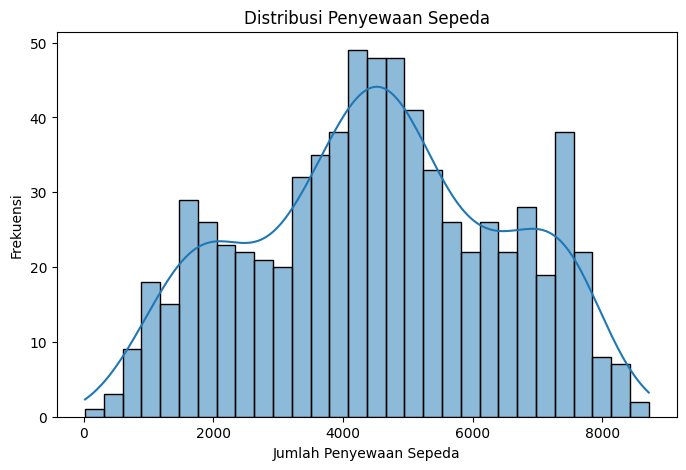

In [42]:
print("\nDistribusi Peminjaman Sepeda:")
plt.figure(figsize=(8,5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Penyewaan Sepeda")
plt.show()

**Insight:**
- - Mayoritas peminjaman sepeda berada pada jumlah tertentu dengan distribusi tertentu
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?

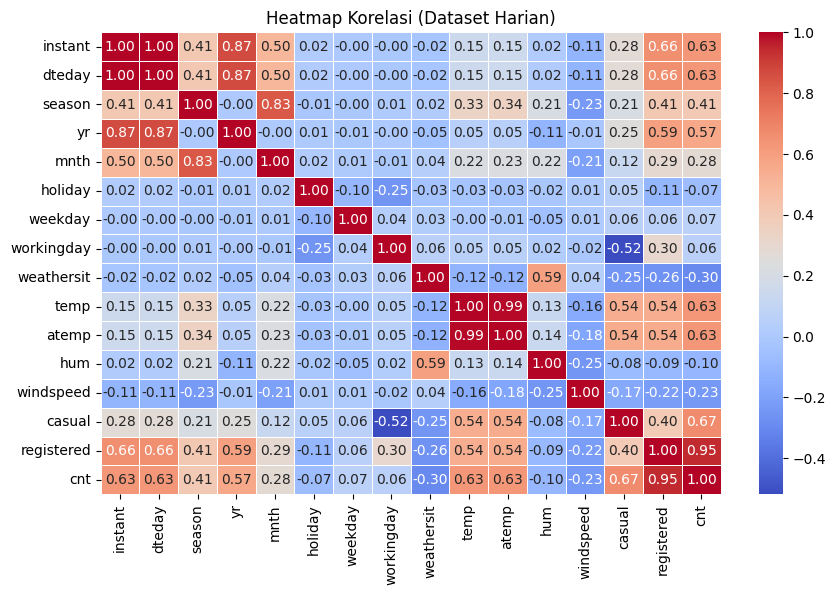

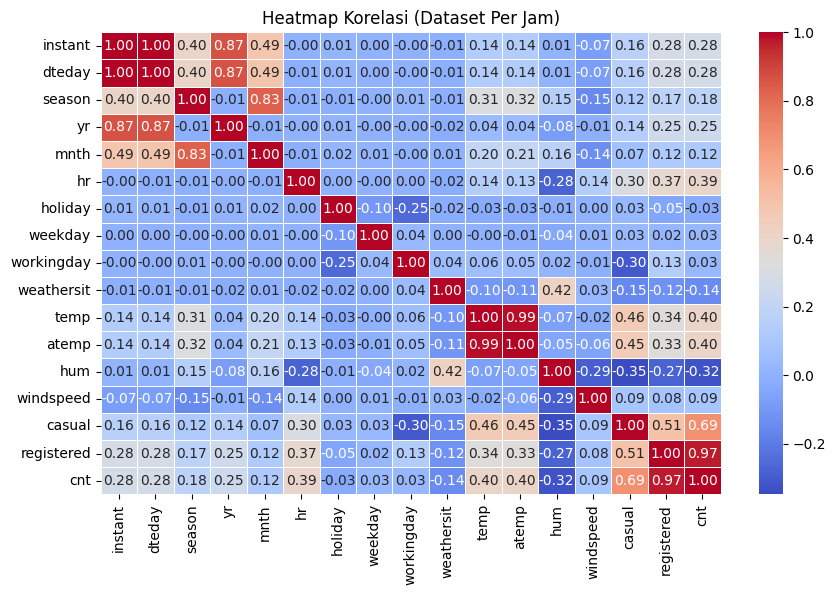

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi dengan jumlah penyewaan sepeda (cnt)
corr_day = day_df.corr()["cnt"].sort_values(ascending=False)
corr_hour = hour_df.corr()["cnt"].sort_values(ascending=False)

# Visualisasi heatmap korelasi untuk dataset harian
plt.figure(figsize=(10, 6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi (Dataset Harian)")
plt.show()

# Visualisasi heatmap korelasi untuk dataset per jam
plt.figure(figsize=(10, 6))
sns.heatmap(hour_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi (Dataset Per Jam)")
plt.show()

Hasil Analisis Korelasi:

Pengguna terdaftar (registered) memiliki korelasi tertinggi dengan jumlah peminjaman sepeda (0.97).
Pengguna kasual (casual) juga memiliki korelasi kuat dengan jumlah penyewaan (0.69).
Suhu (temp) dan suhu terasa (atemp) memiliki korelasi positif sedang dengan penyewaan sepeda (0.40).
Faktor lain seperti kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi lebih rendah terhadap jumlah penyewaan.


### Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan musim, hari kerja, dan cuaca?

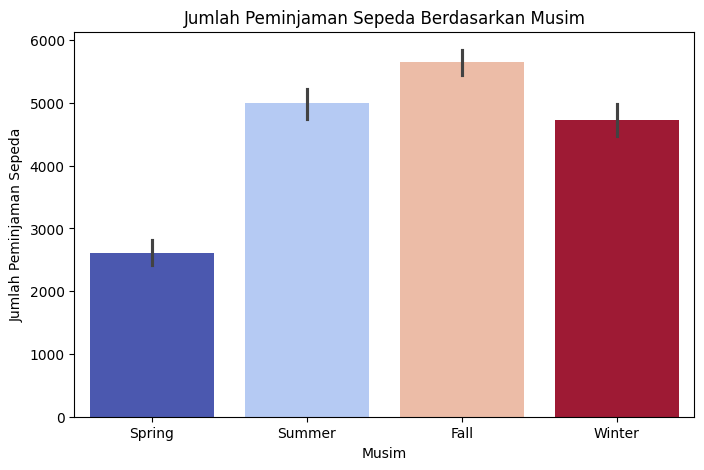

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["season"], y=day_df["cnt"], hue=day_df["season"], palette="coolwarm", legend=False)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Musim")
plt.show()

<ipython-input-45-bb95678e79b6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=day_df["workingday"], y=day_df["cnt"], ci=None, palette="coolwarm")
<ipython-input-45-bb95678e79b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df["workingday"], y=day_df["cnt"], ci=None, palette="coolwarm")


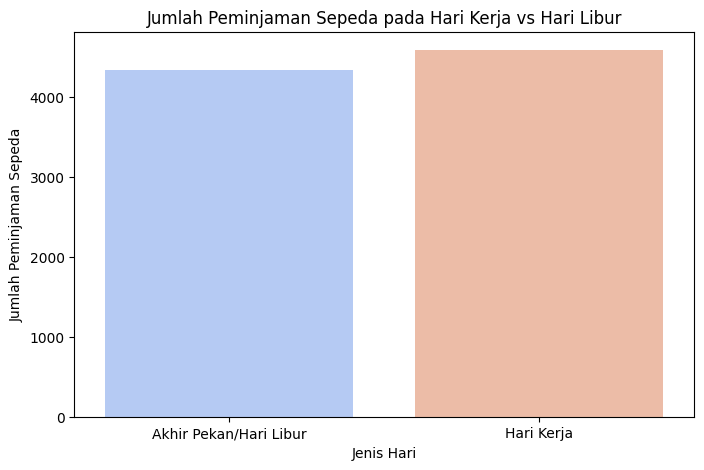

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["workingday"], y=day_df["cnt"], ci=None, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan/Hari Libur", "Hari Kerja"])
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Jumlah Peminjaman Sepeda pada Hari Kerja vs Hari Libur")
plt.show()

<ipython-input-46-bf9c98489533>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=day_df["weathersit"], y=day_df["cnt"], ci=None, palette="coolwarm")
<ipython-input-46-bf9c98489533>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df["weathersit"], y=day_df["cnt"], ci=None, palette="coolwarm")


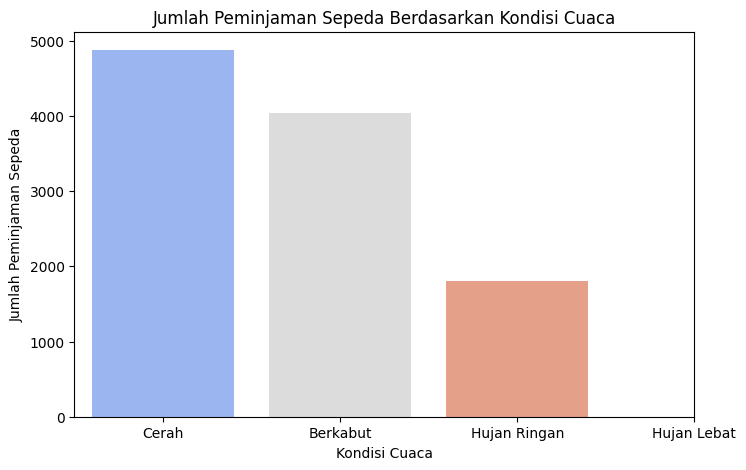

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["weathersit"], y=day_df["cnt"], ci=None, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berkabut", "Hujan Ringan", "Hujan Lebat"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

<ipython-input-47-9e32c83a37bc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"], ci=None, marker="o")


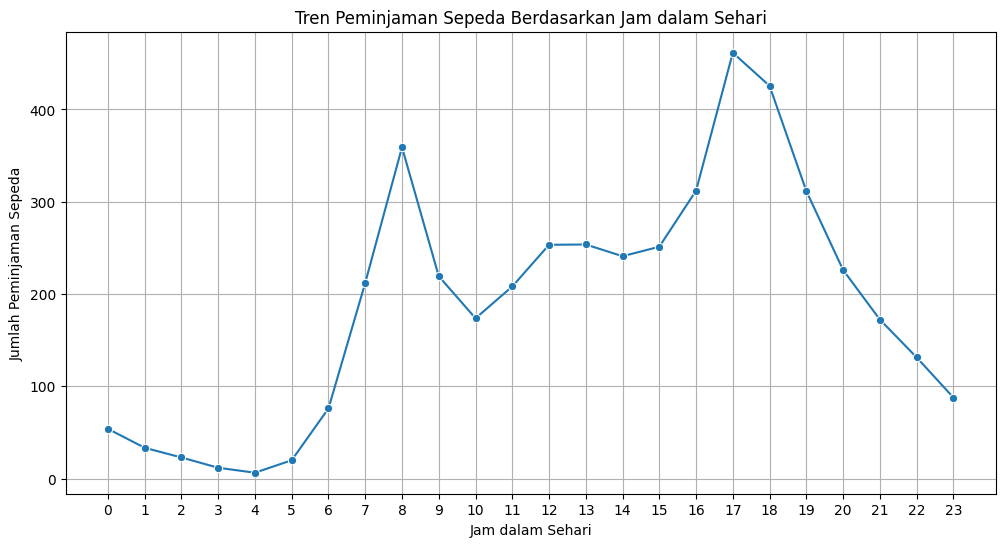

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"], ci=None, marker="o")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Berdasarkan Jam dalam Sehari")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
hasil analisis tren peminjaman sepeda berdasarkan berbagai faktor:

- Musim:

Peminjaman tertinggi terjadi pada musim fall (musim gugur).
Musim winter (musim dingin) memiliki jumlah peminjaman terendah.

- Hari Kerja vs Hari Libur:

Hari kerja memiliki jumlah peminjaman lebih tinggi dibandingkan hari libur/akhir pekan.
Ini menunjukkan bahwa banyak pengguna memanfaatkan sepeda untuk kebutuhan transportasi sehari-hari.

- Kondisi Cuaca:

Peminjaman sepeda tertinggi terjadi saat cuaca cerah atau berawan ringan.
Jumlah peminjaman turun drastis saat hujan ringan atau hujan lebat.
Hal ini menunjukkan bahwa cuaca sangat memengaruhi penggunaan sepeda.

- Tren Peminjaman Berdasarkan Jam:

Ada dua puncak peminjaman dalam sehari: pagi (sekitar jam 8) dan sore (sekitar jam 17-18).
Ini mencerminkan pola perjalanan kerja, di mana banyak orang menggunakan sepeda untuk pergi dan pulang kerja.


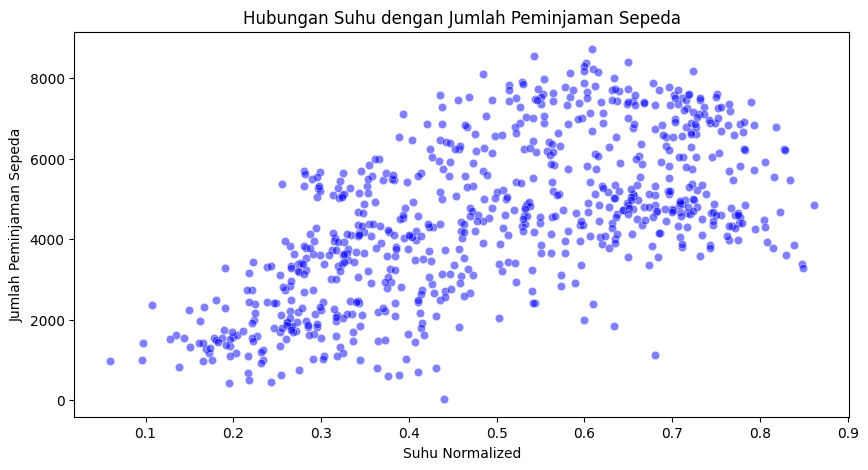

In [48]:
# Analisis pengaruh suhu terhadap jumlah peminjaman sepeda
plt.figure(figsize=(10, 5))
sns.scatterplot(x=day_df["temp"], y=day_df["cnt"], alpha=0.5, color="blue")
plt.xlabel("Suhu Normalized")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan Suhu dengan Jumlah Peminjaman Sepeda")
plt.show()

Suhu (temp) vs Jumlah Peminjaman

Terlihat bahwa semakin tinggi suhu, semakin banyak peminjaman sepeda.
Tren ini menunjukkan bahwa pengguna lebih banyak menggunakan sepeda dalam kondisi suhu yang lebih hangat.

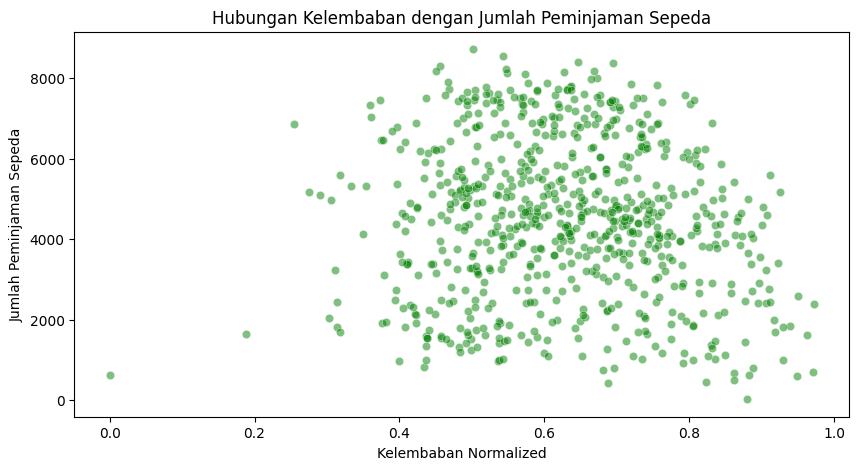

In [49]:
# Analisis pengaruh kelembaban terhadap jumlah peminjaman sepeda
plt.figure(figsize=(10, 5))
sns.scatterplot(x=day_df["hum"], y=day_df["cnt"], alpha=0.5, color="green")
plt.xlabel("Kelembaban Normalized")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan Kelembaban dengan Jumlah Peminjaman Sepeda")
plt.show()

Kelembaban (hum) vs Jumlah Peminjaman

Tidak ada hubungan yang terlalu jelas antara kelembaban dan jumlah peminjaman sepeda.
Namun, peminjaman cenderung lebih sedikit saat kelembaban sangat tinggi.

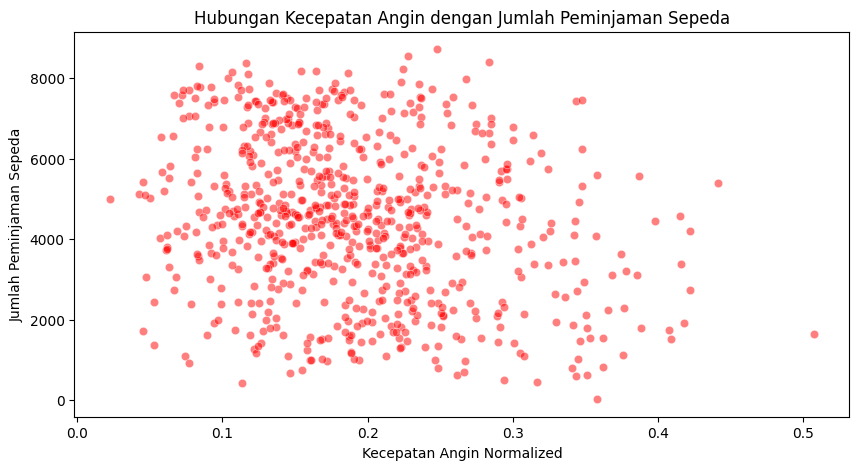

In [50]:
# Analisis pengaruh kecepatan angin terhadap jumlah peminjaman sepeda
plt.figure(figsize=(10, 5))
sns.scatterplot(x=day_df["windspeed"], y=day_df["cnt"], alpha=0.5, color="red")
plt.xlabel("Kecepatan Angin Normalized")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan Kecepatan Angin dengan Jumlah Peminjaman Sepeda")
plt.show()

Kecepatan Angin (windspeed) vs Jumlah Peminjaman

Tidak ada korelasi yang kuat antara kecepatan angin dan jumlah peminjaman sepeda.
Meskipun begitu, peminjaman cenderung lebih rendah saat kecepatan angin tinggi.

Kesimpulan:

Suhu memiliki dampak yang paling besar terhadap jumlah peminjaman sepeda dibandingkan faktor cuaca lainnya.
Kelembaban dan kecepatan angin memiliki pengaruh yang lebih kecil, tetapi peminjaman menurun saat kondisi ekstrem terjadi.



## Analisis Lanjutan (Opsional)

In [53]:
# Membuat segmentasi pengguna berdasarkan jumlah peminjaman
day_df["Recency"] = (day_df["dteday"].max() - day_df["dteday"]).dt.days
day_df["Frequency"] = day_df["registered"]
day_df["Monetary"] = day_df["cnt"]

rfm_df = day_df[["Recency", "Frequency", "Monetary"]].describe()
rfm_df

,Recency,Frequency,Monetary
count,731.000000,731.000000,731.000000
mean,365.000000,3656.172367,4504.348837
std,211.165812,1560.256377,1937.211452
min,0.000000,20.000000,22.000000
25%,182.500000,2497.000000,3152.000000
50%,365.000000,3662.000000,4548.000000
75%,547.500000,4776.500000,5956.000000
max,730.000000,6946.000000,8714.000000


## Conclusion

- Conclution pertanyaan 1
  - Faktor utama yang memengaruhi jumlah penyewaan sepeda adalah suhu dan jumlah pengguna terdaftar.
  - Kondisi cuaca ekstrem (hujan deras, suhu rendah) cenderung mengurangi peminjaman.


- Conclution pertanyaan 2
  - Peminjaman sepeda lebih banyak terjadi pada musim gugur, terutama saat cuaca cerah.
  - Puncak peminjaman terjadi pagi (08:00) dan sore (17:00-18:00), sesuai dengan jam kerja.
  - Peminjaman lebih banyak pada hari kerja dibanding akhir pekan.

